# Data Analysis

File loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
def tl_loader(path_to_file):
    list_to_return = []
    with open(path_to_file, 'r') as file:
        data_text = file.read()
    load_list = ast.literal_eval(data_text)
    for element in load_list:
        list_to_return.append(element[1])
    return list_to_return

def thr_main_loader(path_to_file):
    with open(path_to_file, 'r') as file:
        data_text = file.read()
    data_text = data_text.replace("[", "").replace("]", "")
    sections = data_text.split('\n')
    list_to_return = []
    for section in sections:
        values = section.split(',')
        list_to_return.extend([float(item.strip()) for item in values if item.strip()])
    return list_to_return

def power_loader(path_to_file):
   with open(path_to_file, 'r') as file:
      data_text = file.read()
   data_text = data_text.replace("[", "").replace("]", "")
   sections = data_text.split('\n')
   array_to_return = []
   for section in sections:
      values = section.split(',')
      section_data = [float(item.strip()) for item in values if item.strip()]
      if section_data:
         array_to_return.append(section_data)
   return np.array(array_to_return)

In [3]:
load_1 = tl_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\load_time_sf1.csv')
load_3 = tl_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\load_time_sf3.csv')
load_5 = tl_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\load_time_sf5.csv')
load_8 = tl_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\load_time_sf8.csv')
load_10 = tl_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\load_time_sf10.csv')

power_1 = power_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\power_time_sf1.csv')
power_3 = power_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\power_time_sf3.csv')
power_5 = power_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\power_time_sf5.csv')
power_8 = power_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\power_time_sf8.csv')
power_10 = power_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\power_time_sf10.csv')

thr_main_1 = thr_main_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\ThroughTest_and_Maintenance_sf1.csv')
thr_main_3 = thr_main_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\ThroughTest_and_Maintenance_sf3.csv')
thr_main_5 = thr_main_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\ThroughTest_and_Maintenance_sf5.csv')
thr_main_8 = thr_main_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\ThroughTest_and_Maintenance_sf8.csv')
thr_main_10 = thr_main_loader('C:\\Users\\valer\\Desktop\\Data Warehouses\\TPC-DS\\results\\ThroughTest_and_Maintenance_sf10.csv')

In [4]:
power_1_avg = np.mean(power_1, axis=0)
power_3_avg = np.mean(power_3, axis=0)
power_5_avg = np.mean(power_5, axis=0)
power_8_avg = np.mean(power_8, axis=0)
power_10_avg = np.mean(power_10, axis=0)

QphDS@SF

In [5]:
def Qph_calculator(SF, LT, PT, TMT):
    LT = np.sum(LT)
    PT = np.sum(PT)
    TT1 = np.sum(TMT[0:3])
    TT2 = np.sum(TMT[4:7])
    MT1 = np.sum(TMT[8])
    MT2 = np.sum(TMT[9])

    return round((SF * 99 * 4)/np.power((PT* (TT1 + TT2) * (MT1 + MT2) + LT),0.25),0)

In [6]:
QphDS_1 = Qph_calculator(1, load_1, power_1_avg, thr_main_1)
QphDS_3 = Qph_calculator(3, load_3, power_3_avg, thr_main_3)
QphDS_5 = Qph_calculator(5, load_5, power_5_avg, thr_main_5)
QphDS_8 = Qph_calculator(8, load_8, power_8_avg, thr_main_8)
QphDS_10 = Qph_calculator(10, load_10, power_10_avg, thr_main_10)

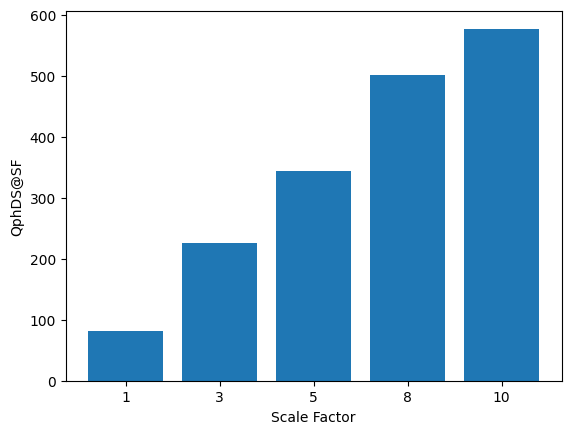

In [7]:
plt.bar(["1","3","5","8","10"], [QphDS_1, QphDS_3, QphDS_5, QphDS_8, QphDS_10])
plt.xlabel('Scale Factor')
plt.ylabel('QphDS@SF')

plt.show()

Execution time by scale factor and type of test

In [8]:
def barplot_list_creator(T1, T3, T5, T8, T10):
    T_list = []
    T_list.append(np.sum(T1))
    T_list.append(np.sum(T3))
    T_list.append(np.sum(T5))
    T_list.append(np.sum(T8))
    T_list.append(np.sum(T10))

    return(T_list)

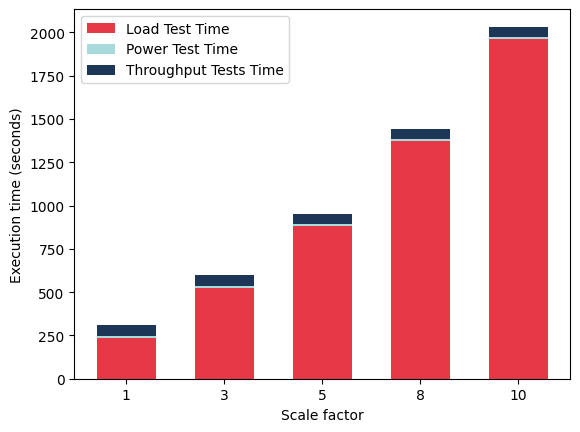

In [15]:
load_stack = barplot_list_creator(load_1, load_3, load_5, load_8, load_10)
power_stack = barplot_list_creator(power_1_avg, power_3_avg, power_5_avg, power_8_avg, power_10_avg)
thr_main_stack = barplot_list_creator(thr_main_1, thr_main_3, thr_main_5, thr_main_8, thr_main_10)

x = ["1","3","5","8","10"]

plt.bar(x, load_stack, width=0.6, label='Load Test Time', color='#e63946')
stack_sum = np.array(load_stack)

plt.bar(x, power_stack, width=0.6, bottom=stack_sum, label='Power Test Time', color='#a8dadc')
stack_sum += np.array(power_stack)

plt.bar(x, thr_main_stack, width=0.6, bottom=stack_sum, label='Throughput Tests Time', color='#1d3557')

plt.xlabel('Scale factor')
plt.ylabel('Execution time (seconds)')
plt.legend()
plt.show()

Individual query performance on Power Tests

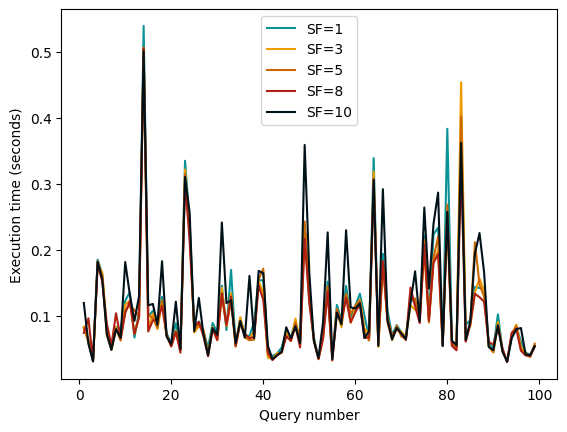

In [10]:
plt.plot(np.arange(1,len(power_1_avg)+1), power_1_avg, color='#0a9396', label='SF=1')
plt.plot(np.arange(1,len(power_3_avg)+1), power_3_avg, color='#ee9b00', label='SF=3')
plt.plot(np.arange(1,len(power_5_avg)+1), power_5_avg, color='#ca6702', label='SF=5')
plt.plot(np.arange(1,len(power_8_avg)+1), power_8_avg, color='#ae2012', label='SF=8')
plt.plot(np.arange(1,len(power_10_avg)+1), power_10_avg, color='#001219', label='SF=10')
plt.legend()
plt.xlabel('Query number')
plt.ylabel('Execution time (seconds)')
plt.show()

Are there queries with an exponential behaviour?

In [11]:
def subplotter(left_int, right_int, subplot_num, t_array):

    i = left_int
    ax = plt.subplot(2, 2, subplot_num)

    for row in t_array[left_int:right_int+1,:]:
        ax.plot(["1","3","5","8","10"], row, label=(f"Query {i}"))
        i +=1
    # ax.legend(ncol=np.shape(t_array)[0])
    
    plt.title(f'Queries from {left_int} to {right_int}')
    plt.xlabel('Scale Factor')
    plt.ylabel('Execution time (seconds)')

def plotter(t_array):
        
    fig = plt.figure(figsize=(15, 10))

    subplotter(1, 25, 1, t_array)
    subplotter(26, 50, 2, t_array)
    subplotter(51, 75, 3, t_array)
    subplotter(76, 99, 4, t_array)

    plt.show()


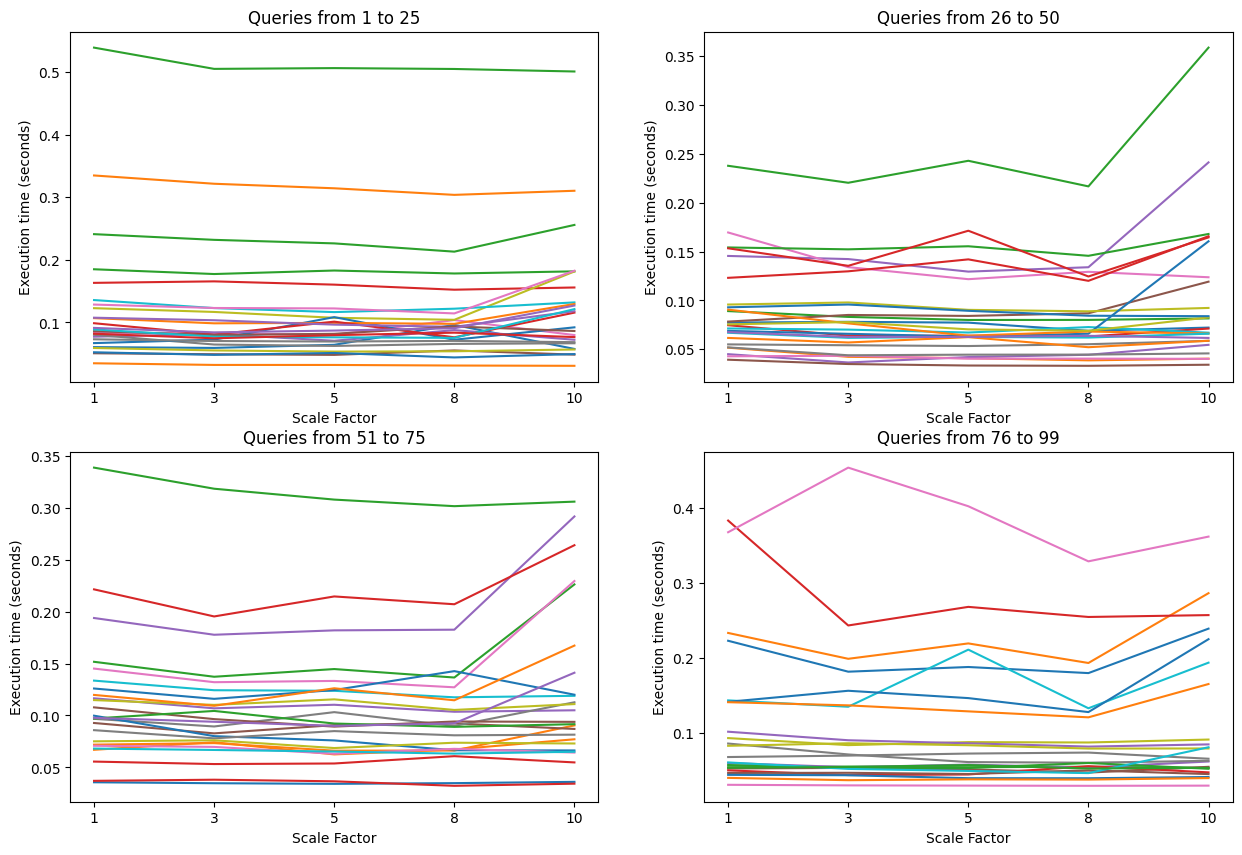

In [12]:
time_array = np.array([power_1_avg, power_3_avg, power_5_avg, power_8_avg, power_10_avg])
transposed_time_array = np.transpose(time_array)

plotter(transposed_time_array)

In [13]:
idx = power_10_avg.argsort()[::-1]
sorted_time_10 = power_10_avg[idx]
sorted_time_8 = power_8_avg[idx]
sorted_time_5 = power_5_avg[idx]
sorted_time_3 = power_3_avg[idx]
sorted_time_1 = power_1_avg[idx]

In [14]:
print('Queries likelier to have an exponential behaviour:')
for element, ten, eight, five, three, one in zip(idx[:10], sorted_time_10[:10], sorted_time_8[:10], sorted_time_5[:10], sorted_time_3[:10], sorted_time_1[:10]):
    print(f'Query number: {element} --- SF=10: {round(ten,2)} --- SF=8: {round(eight,2)} --- SF=5: {round(five,2)} --- SF=3: {round(three,2)} --- SF=1: {round(one,2)}')

Queries likelier to have an exponential behaviour:
Query number: 13 --- SF=10: 0.5 --- SF=8: 0.5 --- SF=5: 0.51 --- SF=3: 0.5 --- SF=1: 0.54
Query number: 82 --- SF=10: 0.36 --- SF=8: 0.33 --- SF=5: 0.4 --- SF=3: 0.45 --- SF=1: 0.37
Query number: 48 --- SF=10: 0.36 --- SF=8: 0.22 --- SF=5: 0.24 --- SF=3: 0.22 --- SF=1: 0.24
Query number: 22 --- SF=10: 0.31 --- SF=8: 0.3 --- SF=5: 0.31 --- SF=3: 0.32 --- SF=1: 0.33
Query number: 63 --- SF=10: 0.31 --- SF=8: 0.3 --- SF=5: 0.31 --- SF=3: 0.32 --- SF=1: 0.34
Query number: 65 --- SF=10: 0.29 --- SF=8: 0.18 --- SF=5: 0.18 --- SF=3: 0.18 --- SF=1: 0.19
Query number: 77 --- SF=10: 0.29 --- SF=8: 0.19 --- SF=5: 0.22 --- SF=3: 0.2 --- SF=1: 0.23
Query number: 74 --- SF=10: 0.26 --- SF=8: 0.21 --- SF=5: 0.21 --- SF=3: 0.2 --- SF=1: 0.22
Query number: 79 --- SF=10: 0.26 --- SF=8: 0.25 --- SF=5: 0.27 --- SF=3: 0.24 --- SF=1: 0.38
Query number: 23 --- SF=10: 0.26 --- SF=8: 0.21 --- SF=5: 0.23 --- SF=3: 0.23 --- SF=1: 0.24
